# Принятие решений в бизнесе
## Анализ результатов A/B-теста


**Что сделать**

- Приоритизируйте гипотезы
- запустите A/B-тест
- проанализируйте результаты.

##  Приоритизация гипотез. ##

**Что сделать**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

##  Анализ A/B-теста. ##

**Что сделать**


Проанализируйте A/B-тест:


- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


- Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Прдставленные данные**

**Данные для первой части**


- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

**orders.csv**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**visitors.csv**

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Предобработка данных**

In [ ]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')

Оценим содержимое таблиц

In [ ]:
#посмотрим таблицу с гипотезами
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

переименовала колонки в нижний регистр, больше в таблице явных проблем нет, она готова к анализу.

In [ ]:
#посмотрим таблицу orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
# переведем дату в нужный формат
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
#переименую колонки для удобстава понимания
orders.columns =['userId', 'orderId', 'date', 'revenue', 'group']

In [ ]:
orders.duplicated().sum()

0

В табилце нет дубликатов, данные чистые, перевела в формате datetime колонку с date, также переименовала колонки для удобстава воспрития.

Таблица готова к анализу

In [ ]:
#посмотрим таблицу visitors
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
visitors.duplicated().sum()

0

In [ ]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

В табилце нет дубликатов, данные чистые, перевела в формате datetime колонку с date.
Таблица готова к анализу

**Часть 1. Приоритизация гипотез**

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [ ]:
pd.options.display.max_colwidth = 400

In [ ]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
#Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [ ]:
#Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**

**Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло**

*Позиции в ICE  и RICE сильно разнятся, гипотеза с индексом 7 находится в 3ке лидеров в обоих методах приоретизации.
Метод RICE расчитывается с участием параметра reach, на мой взгляд, этот параметр один из важнейших, в виду того, что он показывает сколько пользователей охватит изменение которые мы тестируем.*

*Исходя из этого более высокая приоретизация гипотезы с индексом 7*

**Часть 2. Анализ A/B-теста**

In [ ]:
gourp_a_ids = orders.query('group == "A"')['orderId']
gourp_b_ids = orders.query('group == "B"')['orderId']
double = np.intersect1d(gourp_a_ids, gourp_b_ids)
len(double)

58

In [ ]:
orders.query('orderId.isin(@double)').sort_values(by = 'orderId')


,userId,orderId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A
60,1421016313,4256040402,2019-08-16,56650,B
662,1811671147,4266935830,2019-08-29,78990,A


*181 строка повторяется в обоих группах, объем весомый, но с такими данными продолжать анализ невозможно.*

*Данные строки будут удалены*

In [ ]:
orders = orders[orders.isin(double) == False]
orders = orders.dropna()
#orders

**Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

Text(0.5, 1.0, 'График кумулятивной выручки по группам')

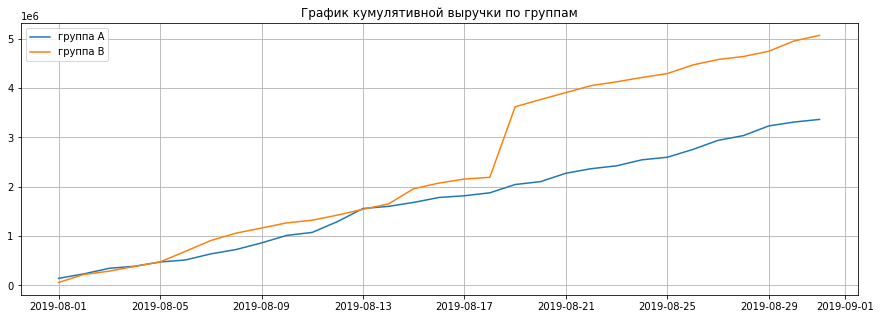

In [ ]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.legend()
plt.title('График кумулятивной выручки по группам')

**Вывод**

*До 5 августа кум.выручка в двух группах была приметно одинковая, однако далее группа В начинает прирастать быстрее, 13
августа группы по выручке сравнялись, скорей всего в группе А в этот день был крупный чек, то же самое можно сказать про 19 авгутса в группе В, к концу эксперимента лидером по кум. выручке является группа В*

**Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

Text(0.5, 1.0, 'График кумулятивного среднего чека по группам')

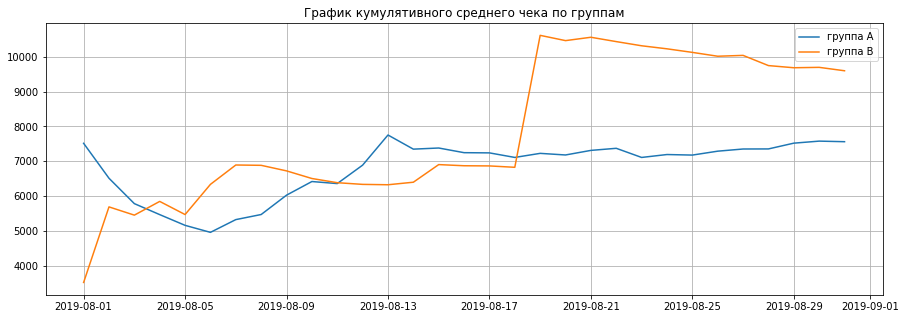

In [ ]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')

**Вывод**

*Судя по графику средний чек в группе В значительно выше чем в группе А, так же подтверждается гипотеза о крупном чеке 19 августа, отчетливо видно на графике скачок. То же самое можно сказать относительно чека в группе А 13 августа. В накопительом значении среднего чека лидирует группа В.*

**Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека групп B к А')

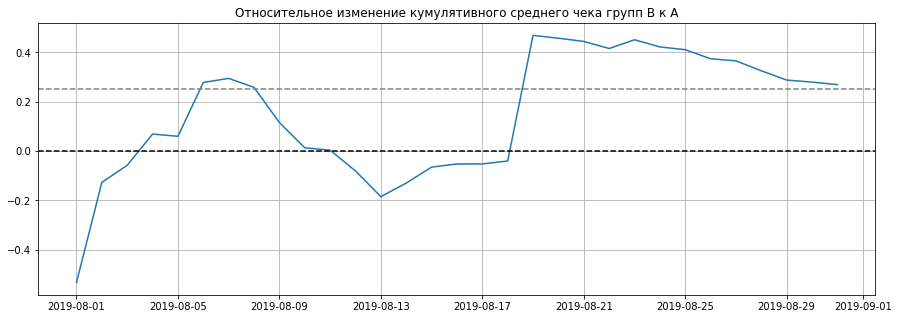

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека групп B к А')


**Вывод**

*Почти с самого начала группа В лидирует по конверсии, относительная фиксация среднего чека наблюдается 19-25 августа(от 40-45%), далее к концу эксперимента средний чек можно зафиксировать примерно на 25% прироста*

**Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

Text(0.5, 1.0, 'График кумулятивного среднего количества заказов на посетителя по группам')

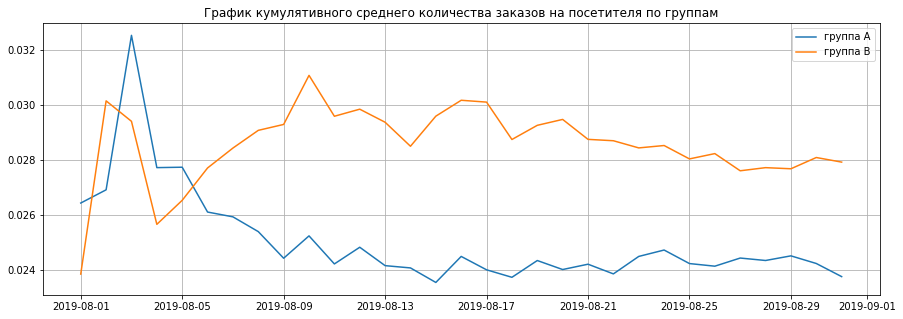

In [ ]:
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date','orders', 'visitors']]
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date','orders', 'visitors']]
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='группа A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='группа B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

**Вывод**

*Интересные данные, группа А фиксирует 3 августа самую высокую конверсию за весь эксперимент, далее стремительно падает.
Группа В имеет более лидирующую позицию, 4 августа начинает активный рост.
Группа В имеет лучшую конверсию кол-ва заказов на посетителя*

**Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

Text(0.5, 1.0, 'Относительное изменение кумулятивной конверсии группы B к группе A')

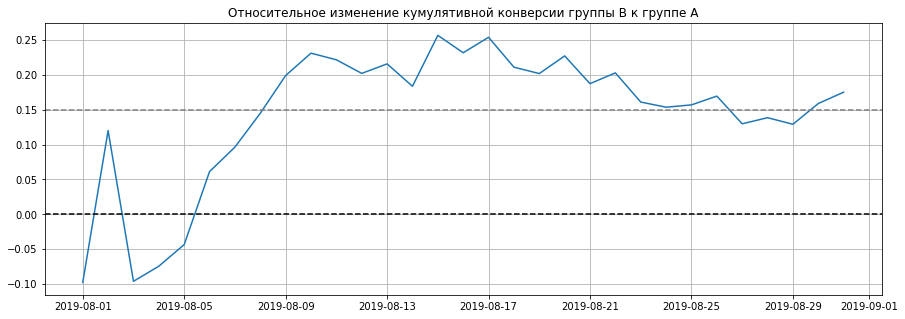

In [ ]:
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])/(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')

**Вывод**

*Как и в предыдущих графиках видно в начале эксперимента всплекс конверии за счет грппы А, далее постепенно группа В "вытягивает" конверсию, к концу эксперимента конверсия фиксируется на отметке примерно 16%*

**Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

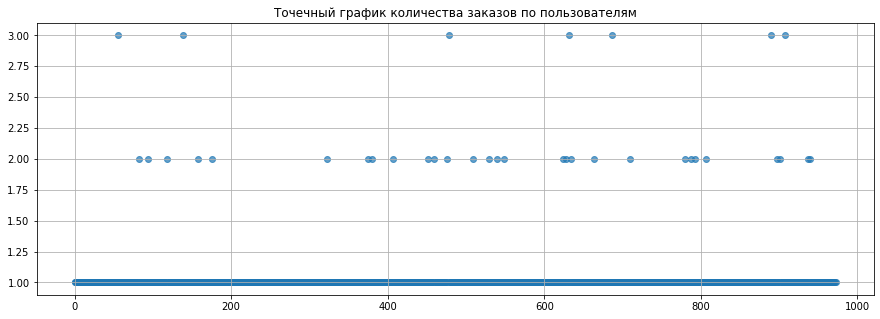

In [ ]:
ordersByUsers = (
    orders.groupby('orderId', as_index=False)
    .agg({'userId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False)

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.7)

plt.title('Точечный график количества заказов по пользователям')

**Вывод**

*Мы видим плотную линию на границе 1 заказа, меньше заказов на позиции 2 и совсем мало на 3 заказа
Будем разбираться дальше, что является выбросом в данном случае.*

**Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [ ]:
np.percentile(ordersByUsers['orders'], [95,99])

array([1., 2.])

In [ ]:
np.percentile(ordersByUsers['orders'], [96,97,98])

array([1., 2., 2.])

**Вывод**

*95% процентов пользователей делают 1 заказ, все что выше будем считать выбросами*

**Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

Text(0.5, 1.0, 'точечный график стоимостей заказов')

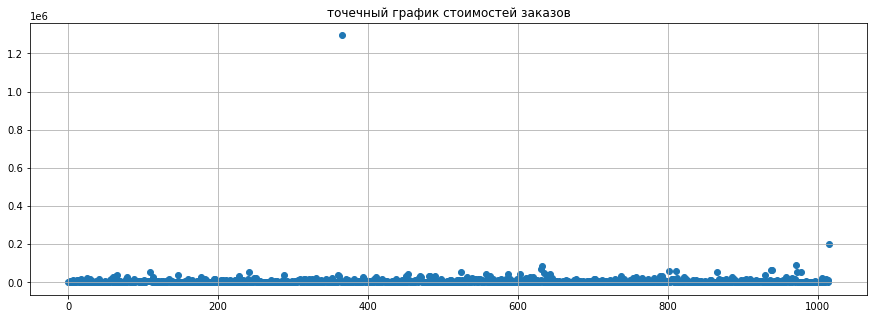

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue'])
plt.title('точечный график стоимостей заказов')

**Вывод**

*Судя по графику осноной массив стоимости до 100000 рублей, есть явный выброс около 1,3 млн.руб, более точно с выбросами разберемся дальше*

**Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод**

*95% покупок сделано в сумме до 26785 руб, верхнюю границу выброса определим 53904 руб*

**Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [ ]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19.0,142779,17.0,59758,19.0,142779,17.0,59758,719,713,719,713
1,2019-08-02,18.0,91602,22.0,162043,37.0,234381,39.0,221801,619,581,1338,1294
2,2019-08-03,24.0,112473,14.0,67049,61.0,346854,53.0,288850,507,509,1845,1803
3,2019-08-04,11.0,41176,13.0,96890,72.0,388030,66.0,385740,717,770,2562,2573
4,2019-08-05,22.0,86383,21.0,89908,94.0,474413,87.0,475648,756,707,3318,3280


**За нулевую гипотезу примем: "стат значимых различий в среднем количестве заказов, по сырым данным, между группами нет", альтернативная гипотеза: "стат значимые различия есть."**

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относит. показатель = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value = 0.017
Относит. показатель = 0.160


**Вывод**

*Пи значение 0,017, что является меньше альфа(0,05), вывод нулевую гипотеpу отвергаем, стат значимость между группами присутствует, разница в группах 16%*

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

**За нулевую гипотезу примем: "стат значимых различий в среднем чеке заказов, по сырым данным, между группами нет", альтернативная гипотеза: "стат значимые различия есть."**

In [ ]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относит. показатель = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.829
Относит. показатель = 0.287


**Вывод**

*Пи значение выше чем альфа(0,05), значит нулевую гипотезу мы отвергнуть не можем, стат. значимых различий в среднем чеке, по сырам данным, нет. По чистым данным мы видим разницу в группах 28,7%, что не является стат значимым*

**Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

Очистим данные.

Из пунктов ранее мы увидели аномальных пользователей и определили их:
- заказы:  и больше 1  
- стоимость заказа > 53904 руб.


На осонованнии данных делаем срезы по критериям:
- числом заказов больше 1  
- стоимость заказа дороже 53904.


In [ ]:
usersWithManyOrders  = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders']>1]['userId'],
     ordersByUsersB[ordersByUsersB['orders']>1]['userId'],
    ],
    axis = 0,
)
usersWithExpensiveOrders = orders[orders['revenue']>53904]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())

1099     316924019
425      590470918
1136     666610489
949     1347999392
1103    1348774318
Name: userId, dtype: int64


Избавились от аномалий, теперь рассчитаем стат значимость в среднем количестве заказов между группами

**За нулевую гипотезу примем: "стат значимых различий в среднем количестве заказов, по очищенным данным, между группами нет", альтернативная гипотеза: "стат значимые различия есть."**

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
        index=np.arange(data['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])
                       ),
            name='orders'
        ),
    ],
    axis=0,
)
sampleBFiltered =sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
        axis=0,
)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относит. показатель = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.015
Относит. показатель = 0.164


**Вывод**

*По очищенным данным видим, что пи значение ниже альфа, значит мы отвергаем нулевую гипотезу, стат значимые различия между группами присуттвуют, группа В превосходит группу А на 16,4%*

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

**За нулевую гипотезу примем: "стат значимых различий в средних чеках между группами нет", альтернативная гипотеза: "стат значимые различия есть."**

In [ ]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относит. показатель = {0:.3f} ".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.901
Относит. показатель = -0.032 


**Вывод**

*Пи значение больше альфа, отвергнуть нулевую гипотезу мы не можем, как и в сырых данных.
Однако, после очистки данных от выбросов, можно заметить как сильно изменился относительный показатель между группами, сейчас он меньше 2%(в сырых данных стат значимость была почти 14%)*

**Примите решение по результатам теста и объясните его. Варианты решений:**


- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

В разрезе данных конверии заказов различия в группах присутствуют, по сырым и очищенным данным группа В лидирует почти на 14%.

Если смотреть на разницу в группах по среднему чеку, то в сырых и очищенных данных видно, что группы разнятся, и после очистки данных группа В также лидирует по отношению к группе А на 14%. В сырых данных разница была почти 26%.

**Тест предлагаю закончить, группа В лидирует по конверии, тем самый является более эффективной**